In [158]:
import matplotlib.pyplot as plt
from pprint import pprint as pp
from PyLTSpice.LTSpice_RawRead import LTSpiceRawRead
from glob import glob
import os

In [194]:
raw_files = glob("/home/mvico/tfg/recursos/OpAmp/spice_deck/analisis_tecnologia/NMOS_L/ID_vs_VDS_swp_VGS/ID-vs-VDS_*_*_VVGS_4.raw")
pp(raw_files)
# len(raw_files)

['/home/mvico/tfg/recursos/OpAmp/spice_deck/analisis_tecnologia/NMOS_L/ID_vs_VDS_swp_VGS/ID-vs-VDS_65_5_VVGS_4.raw',
 '/home/mvico/tfg/recursos/OpAmp/spice_deck/analisis_tecnologia/NMOS_L/ID_vs_VDS_swp_VGS/ID-vs-VDS_125_4p5_VVGS_4.raw',
 '/home/mvico/tfg/recursos/OpAmp/spice_deck/analisis_tecnologia/NMOS_L/ID_vs_VDS_swp_VGS/ID-vs-VDS_0_5p5_VVGS_4.raw']


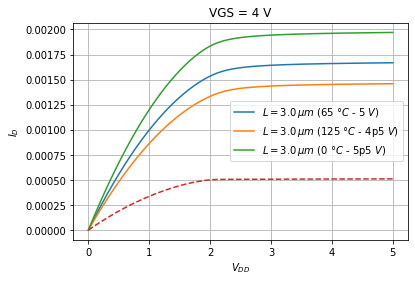

In [206]:
LTRs = [LTSpiceRawRead(LTR) for LTR in raw_files]

x = LTRs[0].get_trace('vvdd')
# pp(x.data)

data = []
diff = []

for index, LTR in enumerate(LTRs):
#     pp(LTR.get_trace_names())
#     pp(LTR.get_raw_property())    

    ID_0p6 = LTR.get_trace("Id(Mn_l_0p6)")
    ID_3p0 = LTR.get_trace("Id(Mn_l_3p0)")
    ID_6p0 = LTR.get_trace("Id(Mn_l_6p0)")
    
    data.append(LTR.get_trace("Id(Mn_l_3p0)").get_wave(0))
    
    _, filename = os.path.split(LTR.raw_params["Filename"])
    corner, _ = os.path.splitext(filename)
    temp, volt = corner.split("_")[1:3]
    vgs = corner.split("_")[4]
           
    plt.title(f"VGS = {vgs} V")
#     plt.plot(x.data, ID_0p6.get_wave(0), label = f"$L = 0.6 \, µm$ ({temp} $\degree C$ - {volt} $V$)")
    plt.plot(x.data, ID_3p0.get_wave(0), label = f"$L = 3.0 \, µm$ ({temp} $\degree C$ - {volt} $V$)")
#     plt.plot(x.data, ID_6p0.get_wave(0), label = f"$L = 6.0 \, µm$ ({temp} $\degree C$ - {volt} $V$)")
    
for w, y, z in zip(data[0], data[1], data[2]):
    big = max([w, y, z])
    small = min([w, y, z])
    diff.append(big - small)
    
plt.plot(x.data, diff, linestyle = "--")

plt.xlabel("$V_{DD}$")
plt.ylabel("$I_{D}$")

plt.legend() # order a legend
plt.autoscale(enable = True, axis = 'both')
plt.grid()
plt.show()

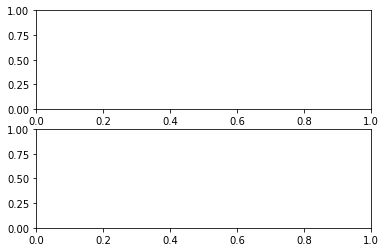

In [160]:
fig, (ax1, ax2) = plt.subplots(2)